In [1]:
import numpy as np
import matplotlib.pyplot as plt
import search
import GraphNode as gn

%load_ext autoreload
%autoreload 2

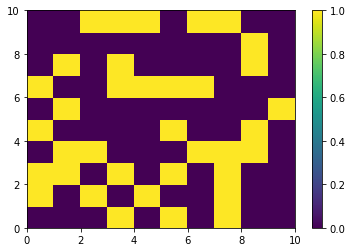

n = (0, 0)
node = (1, 1)
cycle detected


In [2]:
M = 10
N = 10
thresh = 0.7
aMap = np.random.random((M,N))
ind1 = aMap >= thresh
aMap[ind1] = np.ones(np.sum(ind1))
ind0 = aMap < thresh
aMap[ind0] = np.zeros(np.sum(ind0))

start = (0,0)
goal = (M-1,N-1)
aMap[start] = 0
aMap[goal] = 0

fig,ax = plt.subplots()
im = plt.pcolormesh(aMap)
plt.autoscale(True,'both',True)
fig.colorbar(im,ax=ax)
plt.show()

start = (0,0)
reachable_dfsPre = search.dfsPre(aMap,start)
reachable_dfsPost = search.dfsPost(aMap,start)
reachable_bfs = search.bfs(aMap,start)

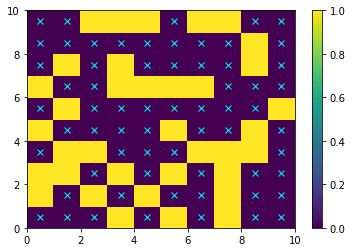

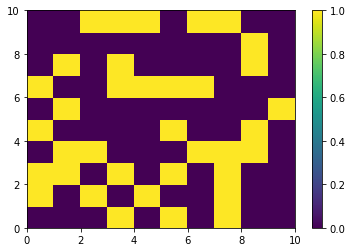

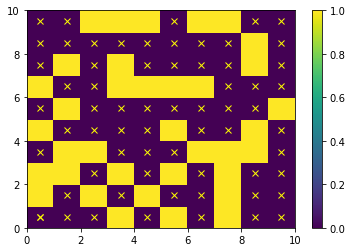

In [3]:
# DFS Pre
fig,ax = plt.subplots()
im = plt.pcolormesh(aMap)
plt.autoscale(True,'both',True)
fig.colorbar(im,ax=ax)

x = []
y = []
for node in reachable_dfsPre:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='cyan',marker='x',linestyle='None')

# DFS Post
fig,ax = plt.subplots()
im = plt.pcolormesh(aMap)
plt.autoscale(True,'both',True)
fig.colorbar(im,ax=ax)

x = []
y = []
for node in reachable_dfsPost:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='magenta',marker='x',linestyle='None')

# BFS
fig,ax = plt.subplots()
im = plt.pcolormesh(aMap)
plt.autoscale(True,'both',True)
fig.colorbar(im,ax=ax)

x = []
y = []
for node in reachable_bfs:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='yellow',marker='x',linestyle='None')

plt.show()

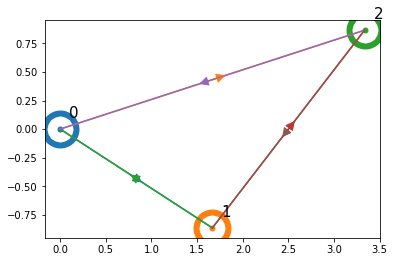

In [4]:
dataIn = '[{"val":0,"idx":0,"idxNgbs":[1,2]},{"val":1,"idx":1,"idxNgbs":[0,2]},{"val":2,"idx":2,"idxNgbs":[0,1]}]'
nodes = gn.deserialize(dataIn,plot=True)

In [5]:
dataOut = gn.serialize(nodes)
print('dataOut = '+str(dataOut))

dataOut = [{"idxNgbs": [1, 2], "idx": 0, "val": 0}, {"idxNgbs": [0, 2], "idx": 1, "val": 1}, {"idxNgbs": [0, 1], "idx": 2, "val": 2}]


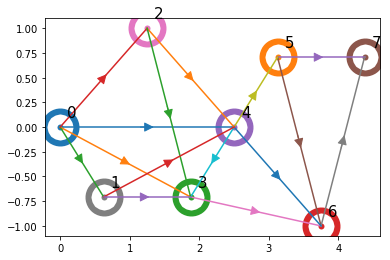

In [6]:
dataIn = '[{"val":0,"idx":0,"idxNgbs":[1,2,3,4]},{"val":1,"idx":1,"idxNgbs":[3,4]},{"val":2,"idx":2,"idxNgbs":[3,4]},{"val":3,"idx":3,"idxNgbs":[6]},{"val":4,"idx":4,"idxNgbs":[3,5,6]},{"val":5,"idx":5,"idxNgbs":[6,7]},{"val":6,"idx":6,"idxNgbs":[7]},{"val":7,"idx":7,"idxNgbs":[]}]'
nodes = gn.deserialize(dataIn,plot=True)

In [7]:
nodesNew = set()
while len(nodes)>0:
    node = nodes.pop() # arbitrary is not random
    nodesNew.add(node)
    if node.val == 0:
        start = node
nodes = nodesNew
        
reachable_dfs2Pre = search.dfs2Pre(nodes,start)
reachable_dfs2Post = search.dfs2Post(nodes,start)
reachable_bfs2 = search.bfs2(nodes,start)

print('reachable_dfs2Pre = '+str(reachable_dfs2Pre))
print('reachable_dfs2Post = '+str(reachable_dfs2Post))
print('reachable_bfs2 = '+str(reachable_bfs2))

reachable_dfs2Pre = [0, 2, 3, 6, 7, 4, 5, 1]
reachable_dfs2Post = [7, 6, 3, 5, 4, 2, 1, 0]
reachable_bfs2 = [0, 4, 3, 1, 2, 5, 6, 7]
